Regression is the process of finding a function that best fits the data. To explore regression, we will use the following steps:

1. Create a dataset
2. Create a model
3. Fit the model
4. Evaluate the model

Feed forward neural networks have the ability to approximate a wide range of functions. See [here](https://en.wikipedia.org/wiki/Feed-forward_neural_network).

For this example shows how the trignometric $\sin(\cdot)$ function can be approximated using PyTorch feed forward neural networks.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

The portion of the $\sin(\cdot)$ function between -5 and 5 is shown below.

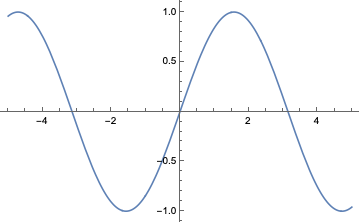

The code below will generate random set of x values between -5 and 5. The $\sin(\cdot)$ of these values is then computed. This will be the data used to train the model. 

The figure below the code shows the randomly selected x data along with the computed sin of those values. You should see an unevenly sampled depiction of the $\sin(\cdot)$ function.

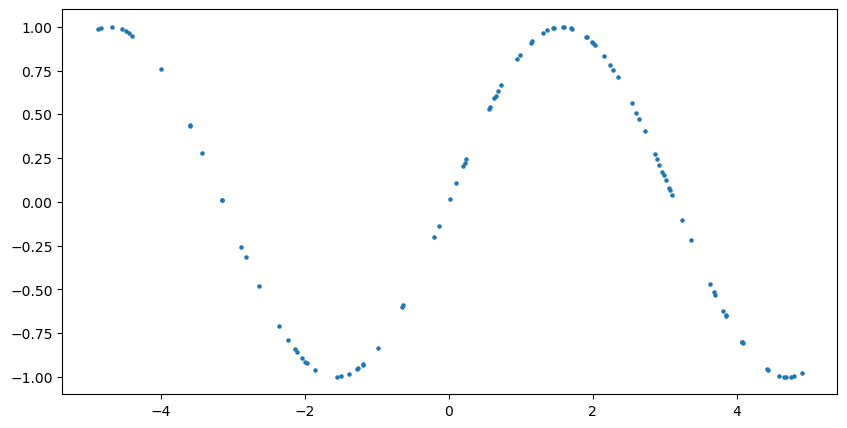

In [2]:
# generate data points
N = 100 # number of data points

# random data on the X-axis in (-5, +5)
X = np.sort(np.random.random(N)*10 - 5)

# compute the sin of X 
Y = np.sin(X)    

# shape of data is (num_samples x num_dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

# convert Numpy float64 to PyTorch float32 
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

plt.figure(figsize=(10,5))
plt.scatter(X,Y,s=5)
plt.show()

This code creates the neural network model with a single hidden layer. There is one input node and one output node. The number of nodes in the hidden layer is set to 20. This can be varied. Two neural network activation functions are in the code, the sigmoid function and the ReLU function. Both of these are typical typical neural network activation functions. One is commented out in the code. You can try both to see if the differences.

The next part of the code is for the optimization process that adjusts the neural network weights so that the loss function is minimized. The loss function is minimized when the output of the neural network matches the target values.

Paramters is vary here are 
1. The number of hidden nodes in the hidden layer
2. The learning rate for the SGD optimized 
3. The number of training epochs

Below the code is a printout of the value of the loss fuction versus training epoch number. You can set the frequency of the printout using the freq value. It is currently set to 1000. Finally a plot of the loss function versus training epoch is shown. You should see this value decrease with the  number of training epochs.


Epoch 1000/10000, Loss: 0.1546
Epoch 2000/10000, Loss: 0.0232
Epoch 3000/10000, Loss: 0.0102
Epoch 4000/10000, Loss: 0.0091
Epoch 5000/10000, Loss: 0.0087
Epoch 6000/10000, Loss: 0.0084
Epoch 7000/10000, Loss: 0.0082
Epoch 8000/10000, Loss: 0.0080
Epoch 9000/10000, Loss: 0.0078
Epoch 10000/10000, Loss: 0.0076


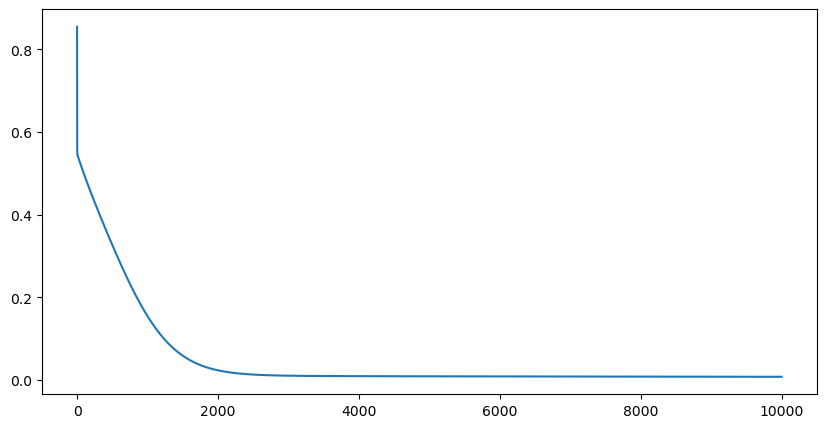

In [3]:
# Create a neural network 
num_hidden_nodes = 100
model = torch.nn.Sequential(
    torch.nn.Linear(1, num_hidden_nodes),
    # torch.nn.ReLU(),
    torch.nn.Sigmoid(),
    torch.nn.Linear(num_hidden_nodes, 1)
)  
# Loss and optimizer MSE - Mean Square Error
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
# Train the model
n_epochs = 10000
losses = []
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)

    # collect losses into a list
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    freq = 1000
    if ( (it+1)%freq == 0 ):
        print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

plt.figure(figsize=(10,5))
plt.plot(losses)
plt.show()

This code shows an overlay of the training data with the output of the neural network model. Ideally, the nerual network output should match the target values.

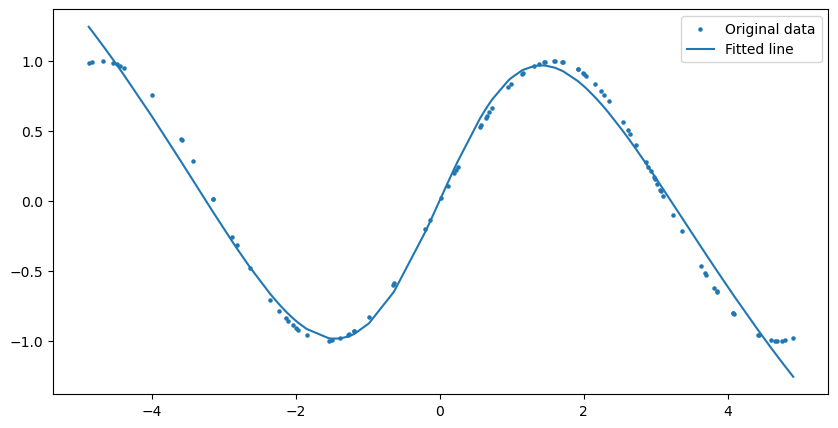

In [4]:
predicted = model(inputs).detach().numpy()
plt.figure(figsize=(10,5))
plt.scatter(X,Y,s=5,label='Original data')
plt.plot(X,predicted,label='Fitted line')
plt.legend()
plt.show()